In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from scipy.interpolate import griddata

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
ls /fs/nas14/other0/cbenitez/partsSim

info_mp_marbles_14032021-122643  mp_marbles_14032021-122643_script.py
info_mp_marbles_15032021-003752  mp_marbles_15032021-003752
mp_marbles_14032021-122643       mp_marbles_15032021-003752LSR
mp_marbles_14032021-122643LSR    mp_marbles_15032021-003752_script.py


In [4]:
DFparts,DFlsrs = mt.read_dat("/fs/nas14/other0/cbenitez/partsSim/",'mp_marbles_15032021-003752') 

In [5]:
DFparts.creation_time=DFparts.creation_time*mt.C.s.express(mt.C.Myr)
DFlsrs.creation_time=DFlsrs.creation_time*mt.C.s.express(mt.C.Myr)

In [6]:
np.unique(DFparts["output"])

array([11, 12, 13, 14, 15, 16])

In [7]:
tt = np.unique(DFparts.creation_time)

In [8]:
tt

array([ 3.25060325,  4.7216629 ,  6.45561442,  7.98573204,  9.55898311,
       11.13404672])

In [9]:
delta_grid = 0.030000005651420025

In [14]:
def arg2plot(opc,min_dens=2.5,max_dens=9,alpha_min=.01,alpha_max=1):
    itc = opc-11
    #df = DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[itc]) & (abs(DFparts.z)<.07)]
    df = DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[itc])]
    #df = DFparts[(DFparts["output"]==opc)]
    
    nx_voxels,ny_voxels,nz_voxels = (int((-df['x'].min()+df['x'].max())/delta_grid))+1,\
                                    (int((-df['y'].min()+df['y'].max())/delta_grid))+1,\
                                    (int((-df['z'].min()+df['z'].max())/delta_grid))+1  
    x, y, z = np.indices((nx_voxels, ny_voxels,nz_voxels))
    where_on_x = map(int,(df['x']-df['x'].min())/delta_grid)
    where_on_y = map(int,(df['y']-df['y'].min())/delta_grid)
    where_on_z = map(int,(df['z']-df['z'].min())/delta_grid)
    voxels_bool = np.zeros_like(x,dtype=bool)
    voxels_bool[where_on_x,where_on_y,where_on_z] = True
    #min_dens = df.dens.min()
    #max_dens = df.dens.max()
    voxels_dens = np.zeros(voxels_bool.shape)
    voxels_alpha = np.zeros(voxels_bool.shape)
    #voxels_dens[where_on_x,where_on_y,where_on_z] = (df['dens']-df['dens'].min())/(df['dens'].max()-df['dens'].min())
    voxels_alpha[where_on_x,where_on_y,where_on_z] = ((df['dens']-df['dens'].min())/(df['dens'].max()-df['dens'].min())+alpha_min/(alpha_max-alpha_min))*(alpha_max-alpha_min)
    voxels_dens[where_on_x,where_on_y,where_on_z] = (df['dens']-min_dens)/(max_dens-min_dens)
    #voxels_alpha[where_on_x,where_on_y,where_on_z] = ((df['dens']-min_dens)/(max_dens-min_dens)+alpha_min/(alpha_max-alpha_min))*(alpha_max-alpha_min)
    colors = plt.cm.viridis(voxels_dens)
    colors[:,:,:,3] = voxels_alpha
    x2, y2, z2 = np.indices((nx_voxels+1, ny_voxels+1,nz_voxels+1))
    X = x2*delta_grid+df['x'].min()-delta_grid/2
    Y = y2*delta_grid+df['y'].min()-delta_grid/2
    Z = z2*delta_grid+df['z'].min()-delta_grid/2
    
    return X,Y,Z,voxels_alpha,colors

In [15]:
def arg2plot_all(opc,min_dens=2.5,max_dens=9,alpha_min=.01,alpha_max=1):
    itc = opc-11
    #df = DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[itc]) & (abs(DFparts.z)<.07)]
    #df = DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[itc])]
    df = DFparts[(DFparts["output"]==opc)]
    
    nx_voxels,ny_voxels,nz_voxels = (int((-df['x'].min()+df['x'].max())/delta_grid))+1,\
                                    (int((-df['y'].min()+df['y'].max())/delta_grid))+1,\
                                    (int((-df['z'].min()+df['z'].max())/delta_grid))+1  
    x, y, z = np.indices((nx_voxels, ny_voxels,nz_voxels))
    where_on_x = map(int,(df['x']-df['x'].min())/delta_grid)
    where_on_y = map(int,(df['y']-df['y'].min())/delta_grid)
    where_on_z = map(int,(df['z']-df['z'].min())/delta_grid)
    voxels_bool = np.zeros_like(x,dtype=bool)
    voxels_bool[where_on_x,where_on_y,where_on_z] = True
    #min_dens = df.dens.min()
    #max_dens = df.dens.max()
    voxels_dens = np.zeros(voxels_bool.shape)
    voxels_alpha = np.zeros(voxels_bool.shape)
    #voxels_dens[where_on_x,where_on_y,where_on_z] = (df['dens']-df['dens'].min())/(df['dens'].max()-df['dens'].min())
    voxels_alpha[where_on_x,where_on_y,where_on_z] = ((df['dens']-df['dens'].min())/(df['dens'].max()-df['dens'].min())+alpha_min/(alpha_max-alpha_min))*(alpha_max-alpha_min)
    voxels_dens[where_on_x,where_on_y,where_on_z] = (df['dens']-min_dens)/(max_dens-min_dens)
    #voxels_alpha[where_on_x,where_on_y,where_on_z] = ((df['dens']-min_dens)/(max_dens-min_dens)+alpha_min/(alpha_max-alpha_min))*(alpha_max-alpha_min)
    colors = plt.cm.viridis(voxels_dens)
    colors[:,:,:,3] = voxels_alpha
    x2, y2, z2 = np.indices((nx_voxels+1, ny_voxels+1,nz_voxels+1))
    X = x2*delta_grid+df['x'].min()-delta_grid/2
    Y = y2*delta_grid+df['y'].min()-delta_grid/2
    Z = z2*delta_grid+df['z'].min()-delta_grid/2
    
    return X,Y,Z,voxels_alpha,colors

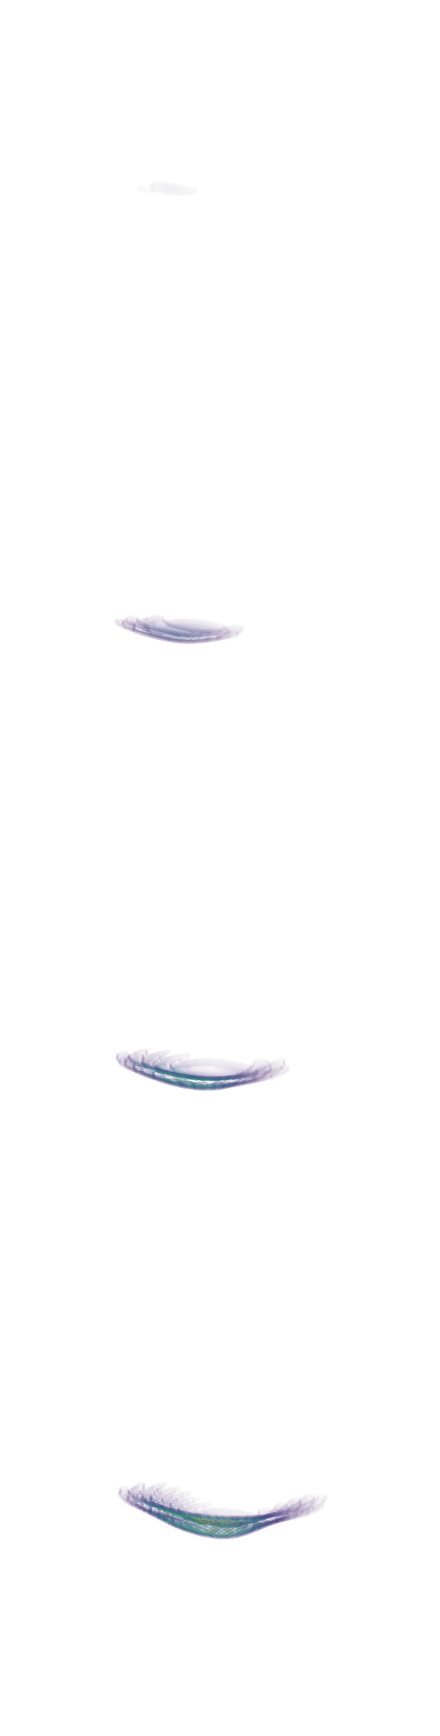

In [50]:
min_dens=2.5
max_dens=9
alpha_min=.01
alpha_max=1
vvox = [arg2plot(op,min_dens=min_dens,max_dens=max_dens,alpha_min=alpha_min,alpha_max=alpha_max) for op in [11,12,13,14]]
max_range = np.array([vvox[-1][0].max()-vvox[-1][0].min(), vvox[-1][1].max()-vvox[-1][1].min(), vvox[-1][2].max()-vvox[-1][2].min()]).max()
Sb=1.
Xb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()) + 0.5*(vvox[-1][0].max()+vvox[-1][0].min())
Yb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()) + 0.5*(vvox[-1][1].max()+vvox[-1][1].min())
Zb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()) + 0.5*(vvox[-1][2].max()+vvox[-1][2].min())
norm = cm.colors.Normalize(min_dens, max_dens)
azim_cam, alt_cam = 15,-45+180

fig,axs = plt.subplots(4,1,figsize=(6,24),subplot_kw=dict(projection='3d'),constrained_layout=True)
axsf = axs.flat
for i in range(len(axsf)):
    #im = axsf[i].imshow(a_zz[i],extent=a_extentto[i],vmin=a_zlims[0], vmax=a_zlims[1],origin='lower',norm=LogNorm())
    vox = axsf[i].voxels(vvox[i][0],vvox[i][1],vvox[i][2],vvox[i][3],facecolors=vvox[i][4])
    for xb, yb, zb in zip(Xb, Yb, Zb):
        axsf[i].plot([xb], [yb], [zb], 'w')
    #axsf[i].set_xlabel(a_xlab,fontsize=fontsize)
    #axsf[i].set_ylabel(a_ylab,fontsize=fontsize)
    ##cbar = fig.colorbar(im,shrink = shrink)
    #axsf[i].set_xlim(a_xlims[0],a_xlims[1])
    #axsf[i].set_ylim(a_ylims[0],a_ylims[1])
    #axsf[i].tick_params(which='major',direction='in',right=True,top=True,length=8,labelsize=fontsize*.8,color='white')
    #axsf[i].minorticks_on()
    #axsf[i].tick_params(which='minor',direction='in',right=True,top=True,length=5,color='white')
    axsf[i].axis('off')
    axsf[i].grid(b=None)
    axsf[i].view_init(azim_cam, alt_cam)

#m = cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)
#m.set_array([])
#fig.colorbar(m,shrink=.75)
    
plt.show()






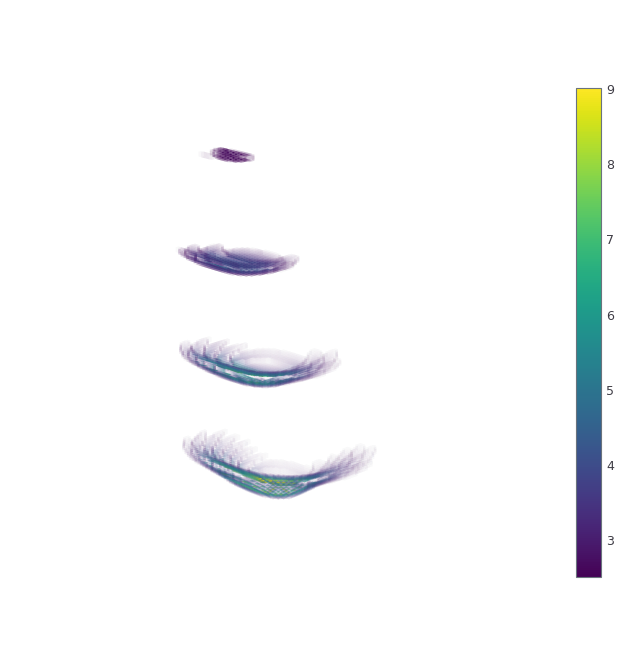

In [70]:
min_dens=2.5
max_dens=9
alpha_min=.4
alpha_max=1
vvox = [arg2plot(op) for op in [11,12,13,14]]
max_range = np.array([vvox[-1][0].max()-vvox[-1][0].min(), vvox[-1][1].max()-vvox[-1][1].min(), vvox[0][2].max()-vvox[-1][2].min()+.6*3]).max()
Sb=1.
Xb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()) + 0.5*(vvox[-1][0].max()+vvox[-1][0].min())
Yb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()) + 0.5*(vvox[-1][1].max()+vvox[-1][1].min())
Zb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()) + 0.5*(vvox[0][2].max()+vvox[-1][2].min()-.6*3)
norm = cm.colors.Normalize(min_dens, max_dens)
azim_cam, alt_cam = 15,-45+180
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.view_init(azim_cam, alt_cam)

for i in range(4):
    vox = ax.voxels(vvox[i][0],vvox[i][1],vvox[i][2]-.6*i,vvox[i][3],facecolors=vvox[i][4])
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')

norm = cm.colors.Normalize(min_dens, max_dens)
m = cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)
m.set_array([])
cbar = fig.colorbar(m,ax=ax,shrink=.75)

ax.axis('off')
ax.grid(b=None)
    
plt.show()







In [12]:
min_dens=2.5
max_dens=13.5
alpha_min=.5
alpha_max=1
vvox_all = [arg2plot_all(op,min_dens=min_dens,max_dens=max_dens,alpha_min=alpha_min,alpha_max=alpha_max) for op in [11,12,13,14]]
max_range = np.array([vvox_all[-1][0].max()-vvox_all[-1][0].min(), vvox_all[-1][1].max()-vvox_all[-1][1].min(), vvox_all[0][2].max()-vvox_all[-1][2].min()+.6*3]).max()
Sb=1.
Xb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()) + 0.5*(vvox_all[-1][0].max()+vvox_all[-1][0].min())
Yb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()) + 0.5*(vvox_all[-1][1].max()+vvox_all[-1][1].min())
Zb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()) + 0.5*(vvox_all[0][2].max()+vvox_all[-1][2].min()-.6*3)

azim_cam = [15,15,15]
alt_cam = [45,10,280]
fontsize=28

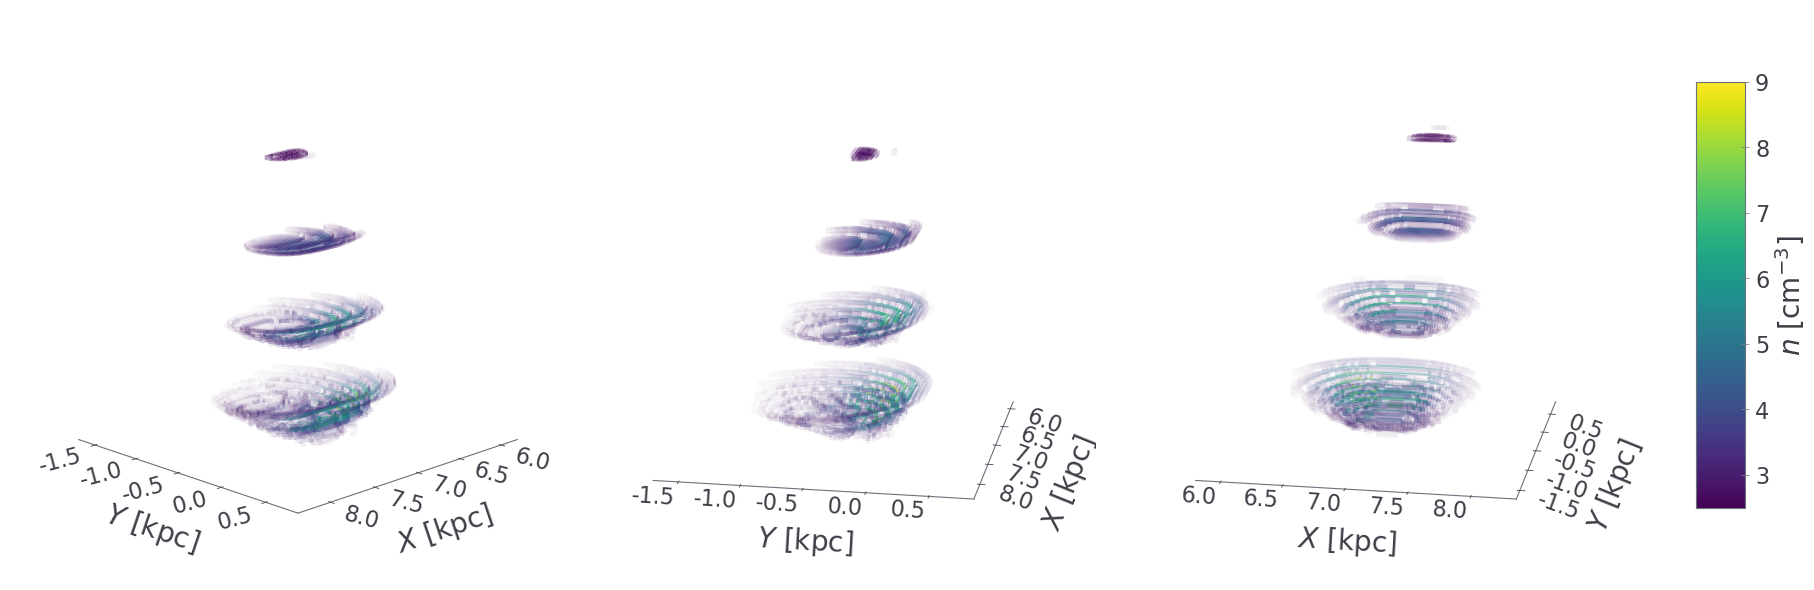

In [173]:
fig,axs = plt.subplots(1,3,figsize=(25,8),subplot_kw=dict(projection='3d'),constrained_layout=True)
axsf = axs.flat
for j in range(len(axsf)):
    for i in range(4):
        vox = axsf[j].voxels(vvox_all[i][0],vvox_all[i][1],vvox_all[i][2]-.6*i,vvox_all[i][3],facecolors=vvox_all[i][4])
    for xb, yb, zb in zip(Xb, Yb, Zb):
        axsf[j].plot([xb], [yb], [zb], 'w')
    #axsf[j].axis('off')
    axsf[j].grid(b=None)
    axsf[j].view_init(azim_cam[j], alt_cam[j])
    axsf[j].w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j].w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j].w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j].w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    axsf[j].set_zticks([])
    axsf[j].set_yticks([-1.5,-1.0,-0.5,0.0,0.5])
    axsf[j].set_xticks([6.0,6.5,7.0,7.5,8.0])
    
    if j==1:
        axsf[j].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='right',rotation=-4)
        axsf[j].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-20)
        axsf[j].set_xlabel('      $\,\,\,X$ [kpc]',fontsize=fontsize,labelpad=39)
        axsf[j].set_ylabel('$Y$ [kpc]',fontsize=fontsize,labelpad=15)
    elif j==2:
        axsf[j].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-20)
        axsf[j].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='right',rotation=-4)
        axsf[j].set_xlabel('$X$ [kpc]',fontsize=fontsize,labelpad=15)
        axsf[j].set_ylabel('      $\,\,\,Y$ [kpc]',fontsize=fontsize,labelpad=42)
    else:
        axsf[j].set_xlabel('$X$ [kpc]',fontsize=fontsize,labelpad=20)
        axsf[j].set_ylabel('$Y$ [kpc]',fontsize=fontsize,labelpad=20)
        axsf[j].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='right',rotation=15)
        axsf[j].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-15)



    axsf[j].tick_params(which='major',direction='inout',length=8,labelsize=fontsize*.8)
    

norm = cm.colors.Normalize(min_dens, max_dens)
m = cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)
m.set_array([])
cbar = fig.colorbar(m,ax=axs[:],shrink=.75)
cbar.set_label("$n$ [cm$^{-3}$]", rotation=90,fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize*.8,rotation=0,size=8,direction='inout',color='grey',which="major")
fig.set_constrained_layout_pads(w_pad=0, h_pad=0, hspace=-.1, wspace=-.04)

plt.show()

_________

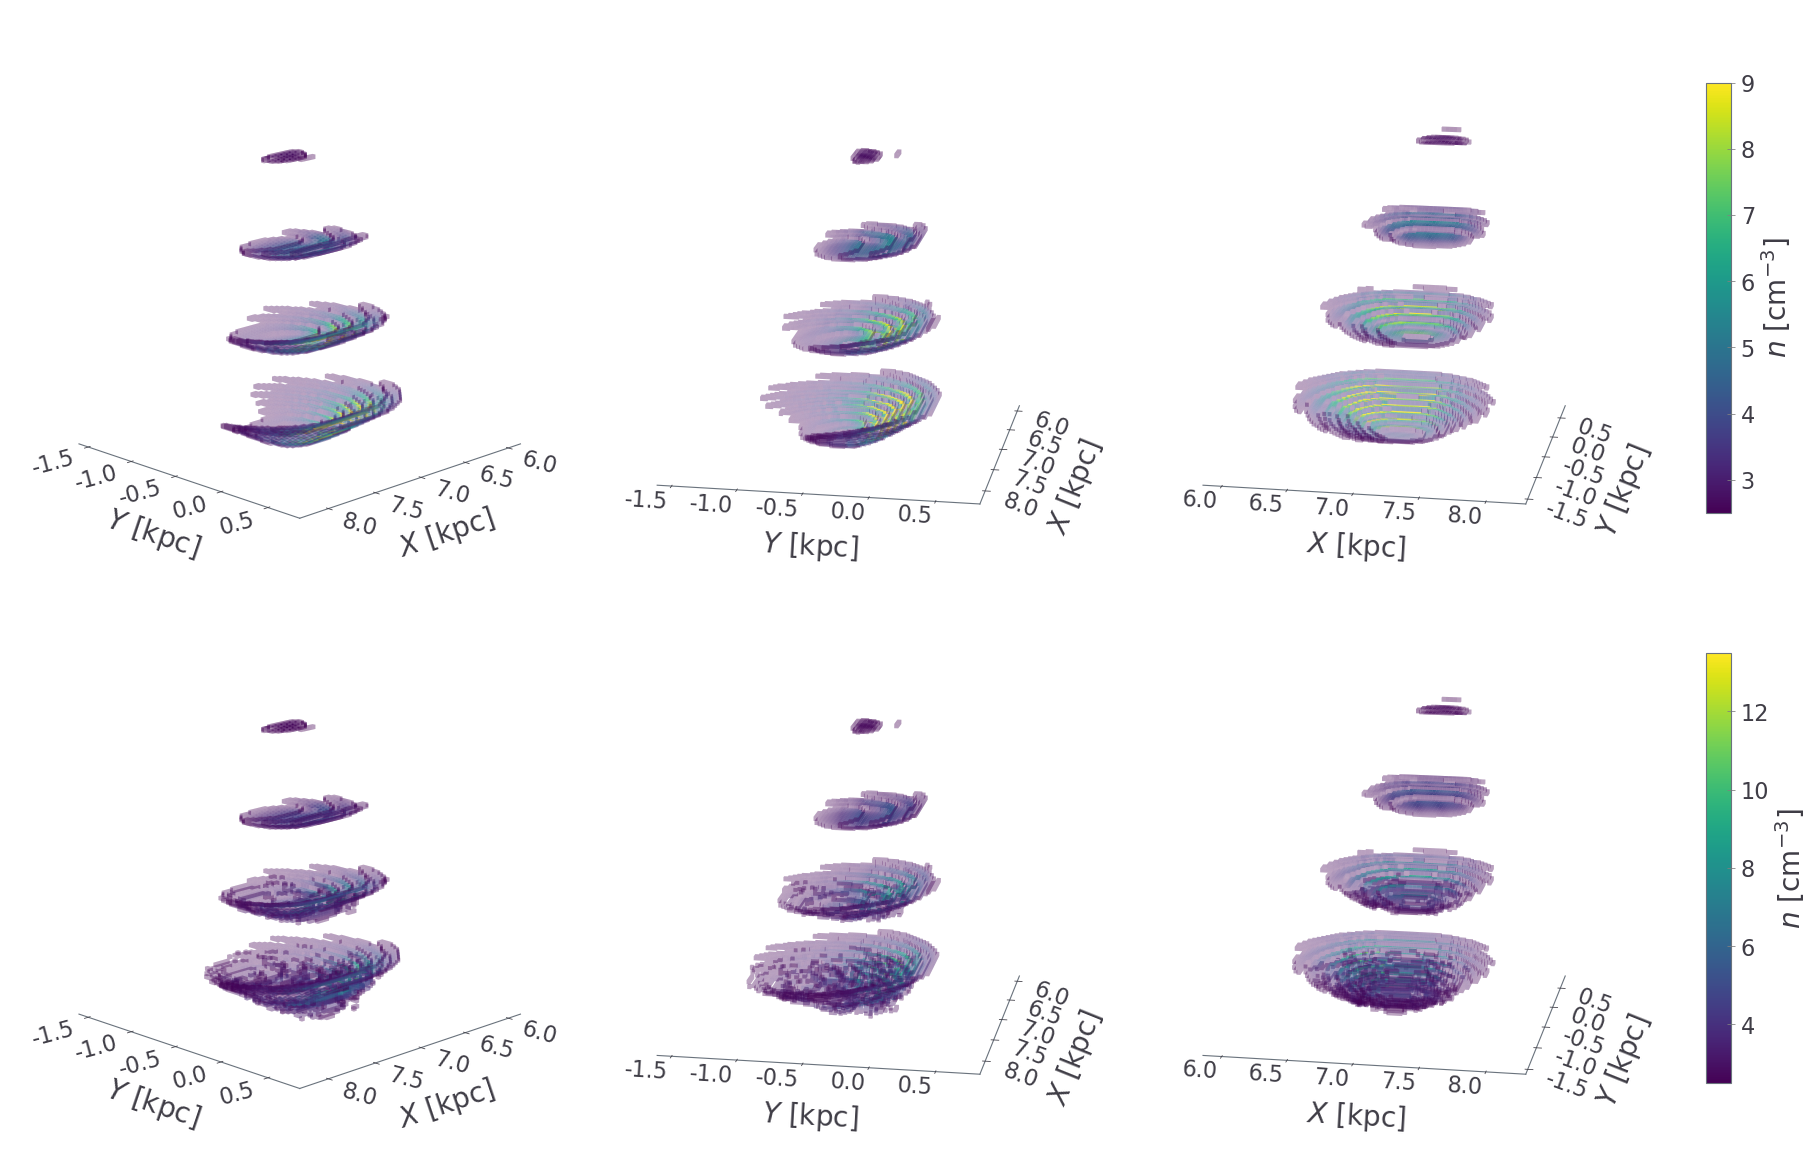

In [17]:
min_dens=2.5
max_dens=9
alpha_min=.2
alpha_max=1
vvox = [arg2plot(op,min_dens=min_dens,max_dens=max_dens,alpha_min=alpha_min,alpha_max=alpha_max) for op in [11,12,13,14]]
max_range = np.array([vvox[-1][0].max()-vvox[-1][0].min(), vvox[-1][1].max()-vvox[-1][1].min(), vvox[0][2].max()-vvox[-1][2].min()+.6*3]).max()
Sb=1.
Xb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()) + 0.5*(vvox[-1][0].max()+vvox[-1][0].min())
Yb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()) + 0.5*(vvox[-1][1].max()+vvox[-1][1].min())
Zb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()) + 0.5*(vvox[0][2].max()+vvox[-1][2].min()-.6*3)

azim_cam = [15,15,15]
alt_cam = [45,10,280]
fontsize=28

fig,axs = plt.subplots(2,3,figsize=(25,16),subplot_kw=dict(projection='3d'),constrained_layout=True)
axsf = axs.flat
for j in range(len(axsf)/2):
    for i in range(4):
        vox = axsf[j].voxels(vvox[i][0],vvox[i][1],vvox[i][2]-.6*i,vvox[i][3],facecolors=vvox[i][4])
    for xb, yb, zb in zip(Xb, Yb, Zb):
        axsf[j].plot([xb], [yb], [zb], 'w')
    #axsf[j].axis('off')
    axsf[j].grid(b=None)
    axsf[j].view_init(azim_cam[j], alt_cam[j])
    axsf[j].w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j].w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j].w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j].w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    axsf[j].set_zticks([])
    axsf[j].set_yticks([-1.5,-1.0,-0.5,0.0,0.5])
    axsf[j].set_xticks([6.0,6.5,7.0,7.5,8.0])
    
    if j==1:
        axsf[j].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='right',rotation=-4)
        axsf[j].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-20)
        axsf[j].set_xlabel('      $\,\,\,X$ [kpc]',fontsize=fontsize,labelpad=39)
        axsf[j].set_ylabel('$Y$ [kpc]',fontsize=fontsize,labelpad=15)
    elif j==2:
        axsf[j].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-20)
        axsf[j].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='right',rotation=-4)
        axsf[j].set_xlabel('$X$ [kpc]',fontsize=fontsize,labelpad=15)
        axsf[j].set_ylabel('      $\,\,\,Y$ [kpc]',fontsize=fontsize,labelpad=42)
    else:
        axsf[j].set_xlabel('$X$ [kpc]',fontsize=fontsize,labelpad=20)
        axsf[j].set_ylabel('$Y$ [kpc]',fontsize=fontsize,labelpad=20)
        axsf[j].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='right',rotation=15)
        axsf[j].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-15)



    axsf[j].tick_params(which='major',direction='inout',length=8,labelsize=fontsize*.8)
    

norm = cm.colors.Normalize(min_dens, max_dens)
m = cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)
m.set_array([])
cbar = fig.colorbar(m,ax=axs[0,:],shrink=.75)
cbar.set_label("$n$ [cm$^{-3}$]", rotation=90,fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize*.8,rotation=0,size=8,direction='inout',color='grey',which="major")
fig.set_constrained_layout_pads(w_pad=0, h_pad=0, hspace=-.1, wspace=-.04)

min_dens=2.5
max_dens=13.5
vvox_all = [arg2plot_all(op,min_dens=min_dens,max_dens=max_dens,alpha_min=alpha_min,alpha_max=alpha_max) for op in [11,12,13,14]]
max_range = np.array([vvox[-1][0].max()-vvox[-1][0].min(), vvox[-1][1].max()-vvox[-1][1].min(), vvox[0][2].max()-vvox[-1][2].min()+.6*3]).max()
Sb=1.
Xb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()) + 0.5*(vvox[-1][0].max()+vvox[-1][0].min())
Yb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()) + 0.5*(vvox[-1][1].max()+vvox[-1][1].min())
Zb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()) + 0.5*(vvox[0][2].max()+vvox[-1][2].min()-.6*3)

azim_cam = [15,15,15]
alt_cam = [45,10,280]
fontsize=28



for j in range(len(axsf)/2):
    for i in range(4):
        vox = axsf[j+3].voxels(vvox_all[i][0],vvox_all[i][1],vvox_all[i][2]-.6*i,vvox_all[i][3],facecolors=vvox_all[i][4])
    for xb, yb, zb in zip(Xb, Yb, Zb):
        axsf[j+3].plot([xb], [yb], [zb], 'w')
    #axsf[j].axis('off')
    axsf[j+3].grid(b=None)
    axsf[j+3].view_init(azim_cam[j], alt_cam[j])
    axsf[j+3].w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j+3].w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j+3].w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    axsf[j+3].w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    axsf[j+3].set_zticks([])
    axsf[j+3].set_yticks([-1.5,-1.0,-0.5,0.0,0.5])
    axsf[j+3].set_xticks([6.0,6.5,7.0,7.5,8.0])
    
    if j==1:
        axsf[j+3].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='right',rotation=-4)
        axsf[j+3].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-20)
        axsf[j+3].set_xlabel('      $\,\,\,X$ [kpc]',fontsize=fontsize,labelpad=39)
        axsf[j+3].set_ylabel('$Y$ [kpc]',fontsize=fontsize,labelpad=15)
    elif j==2:
        axsf[j+3].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-20)
        axsf[j+3].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='right',rotation=-4)
        axsf[j+3].set_xlabel('$X$ [kpc]',fontsize=fontsize,labelpad=15)
        axsf[j+3].set_ylabel('      $\,\,\,Y$ [kpc]',fontsize=fontsize,labelpad=42)
    else:
        axsf[j+3].set_xlabel('$X$ [kpc]',fontsize=fontsize,labelpad=20)
        axsf[j+3].set_ylabel('$Y$ [kpc]',fontsize=fontsize,labelpad=20)
        axsf[j+3].set_yticklabels(axsf[j].get_yticks(),verticalalignment='baseline',horizontalalignment='right',rotation=15)
        axsf[j+3].set_xticklabels(axsf[j].get_xticks(),verticalalignment='baseline',horizontalalignment='left',rotation=-15)



    axsf[j+3].tick_params(which='major',direction='inout',length=8,labelsize=fontsize*.8)
    

norm = cm.colors.Normalize(min_dens, max_dens)
m = cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)
m.set_array([])
cbar = fig.colorbar(m,ax=axs[1,:],shrink=.75)
cbar.set_label("$n$ [cm$^{-3}$]", rotation=90,fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize*.8,rotation=0,size=8,direction='inout',color='grey',which="major")
fig.set_constrained_layout_pads(w_pad=0, h_pad=0, hspace=-.02, wspace=-.04)
fig.savefig("particulas 11-14.pdf", format='pdf',bbox_inches='tight')
plt.show()